In [13]:
import torch
from torch import nn
from torchvision import datasets, transforms

In [14]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(10, 63),
            nn.ReLU(),
            nn.Linear(63, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        code = self.encoder(x)
        return self.decoder(code)

In [36]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 1, 3),
            nn.Sigmoid()
        )

    def forward(self, x):
        # print(x.shape)
        code = self.encoder(x)
        # print(code.shape)
        return self.decoder(code)

In [37]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [38]:
from torch.utils.data import DataLoader
from torch import optim

In [39]:
train_loader = DataLoader(train_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=128)

In [40]:
device = 'cuda'
# model = Autoencoder().to(device)
model = ConvAutoencoder().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
# optimizer = optim.SGD(model.parameters(), lr=1e-3)

In [41]:
count = 0
for param in model.parameters():
    count += param.numel()
print(count)

37569


In [42]:
def train_loop(model, loader, loss_fn, optimizer, device):
    model.train()
    total_loss = 0
    for X, _ in loader:
        X = X.to(device)
        reconstructed = model(X)
        # loss = loss_fn(reconstructed, X.reshape(X.shape[0], -1))
        loss = loss_fn(reconstructed, X)
        loss.backward()
        total_loss += loss.item()

        optimizer.step()
        optimizer.zero_grad()
    print(total_loss / len(loader))

In [43]:
def test_loop(model, loader, loss_fn, device):
    model.eval()
    with torch.no_grad():
        total_loss = 0
        for X, _ in loader:
            X = X.to(device)
            reconstructed = model(X)
            # loss = loss_fn(reconstructed, X.reshape(X.shape[0], -1))
            loss = loss_fn(reconstructed, X)
            total_loss += loss.item()
        print(total_loss / len(loader))

In [44]:
for epoch in range(10):
    train_loop(model, train_loader, loss_fn, optimizer, device)
    test_loop(model, test_loader, loss_fn, device)

0.0015719444801632404
0.00022184063055658641
7.668720972006902e-05
4.474595242512966e-05
4.677808308514204e-05
2.6713990924299304e-05
3.2886679256024e-05
7.848035537894179e-05
0.0002890859814331572
6.025836184470549e-05
4.948164133820062e-05
0.00012202628015443282
3.6517994176043616e-05
3.1968407757297345e-05
2.9410115900872793e-05
0.0001934554718532069
2.747228786468194e-05
3.571078393835268e-05
2.5155838952712672e-05
0.00016398226626400094


In [45]:
model.eval()
X, _ = test_dataset[0]
encoded = model.encoder(X.to(device).view(1, 1, 28, 28))
encoded

tensor([[[[0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473],
          [0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473],
          [0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473],
          ...,
          [0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473],
          [0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473],
          [0.2473, 0.2473, 0.2473,  ..., 0.2473, 0.2473, 0.2473]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [46]:
# new_random = encoded + torch.randn(encoded.shape())
# new_random

In [47]:
decoded = model.decoder(encoded)
# decoded = model.decoder(new_random)

In [48]:
from matplotlib import pyplot as plt

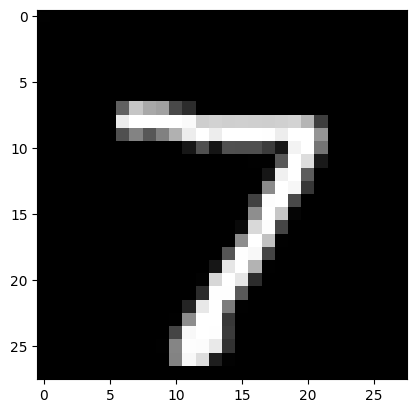

In [49]:
plt.imshow(decoded.reshape(28,28).cpu().detach().numpy(), cmap='gray')

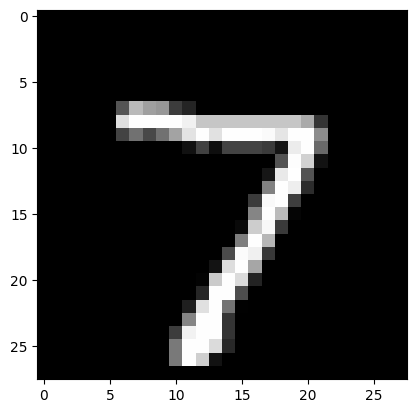

In [50]:
plt.imshow(X.reshape(28,28), cmap='gray')